In [ ]:
#Importacion de librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
pd.set_option("display.max_rows", None)

In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1_pLgrGHxajA0645dUjNsQS_nBiVrHgVW/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =";")

In [ ]:
data = datadrive.drop(["ID","b","e","DR"], axis = 1)
data.tail()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
2121,140,0,0,6,79,0.2,25,7.2,0,0,0,40,137,177,4,0,153,150,152,2,0,1
2122,140,1,0,9,78,0.4,22,7.1,0,0,0,66,103,169,6,0,152,148,151,3,1,1
2123,140,1,0,7,79,0.4,20,6.1,0,0,0,67,103,170,5,0,153,148,152,4,1,1
2124,140,1,0,9,78,0.4,27,7.0,0,0,0,66,103,169,6,0,152,147,151,4,1,1
2125,142,1,1,5,74,0.4,36,5.0,0,0,0,42,117,159,2,1,145,143,145,1,0,0


# Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o continúa. 

In [ ]:
#Se consideraron las siguinetes variables como cualitatibas debido a que se podrianb considerar como categoricas 
cualitativas = data[["Mode","Tendency","Target"]]
cualitativas=cualitativas.columns.to_list()
print("\033[1m"+"Las variables cualitativas son: "+"\033[0m")
for i in cualitativas:
  print(str(i))


Las variables cualitativas son: 
Mode
Tendency
Target


In [ ]:
cuantitativas = data.drop(cualitativas,axis=1)
discretas = data.drop(cualitativas,axis=1)
discretas = data.drop(cuantitativas,axis=1)
discretas = cuantitativas.drop(["Mean","Median","Variance","Max","Min","Width","MLTV","MSTV","Nmax","Nzeros"],axis=1)
discretas=discretas.columns.to_list()
continuas = data.drop(discretas,axis=1)
continuas = continuas.drop(cualitativas,axis=1)
continuas=continuas.columns.to_list()
print("\033[1m"+"Las variables cualitativas son: "+"\033[0m")
for i in cuantitativas:
  print(str(i))
print("\033[1m"+"Las variables cualitativas discretas son: "+"\033[0m")
for i in discretas:
  print(str(i))
print("\033[1m"+"Las variables cualitativas continuas son: "+"\033[0m")
for i in continuas:
  print(str(i))

Las variables cualitativas son: 
LBE
AC
FM
UC
ASTV
MSTV
ALTV
MLTV
DL
DS
DP
Width
Min
Max
Nmax
Nzeros
Mean
Median
Variance
Las variables cualitativas discretas son: 
LBE
AC
FM
UC
ASTV
ALTV
DL
DS
DP
Las variables cualitativas continuas son: 
MSTV
MLTV
Width
Min
Max
Nmax
Nzeros
Mean
Median
Variance


# ¿Cuál es la proporción de estados fetales normales? ¿y anormales?
Desconozco si esta bien este ejercicio debido a que no comprendo de donde se determina si un feto es normal o anormal

In [ ]:
fetales= data[["ASTV","ALTV"]]
Total = 20934+99901
anormalC = ((fetales.ASTV.sum()*100)/2126)/100
normalC = 100-anormalC
normalL = ((fetales.ALTV.sum()*100)/2126)/100
anormalL = 100-normalL
normal=(normalC+normalL)/2
anormal=(anormalC+anormalL)/2
print('''El porcentaje fetal con variabilidad anormal a largo plazo es {}%, mientras que el porcentaje de normales es {}% , 
Por otro lado,El porcentaje fetal con variabilidad anormal a corto plazo es {}%, mientras que el porcentaje de normales es {}%,
esto en proporciones nos dice que los fetos con variabilidad anormal representan {}% y los normales {}% '''.format(anormalL,normalL,anormalC,normalC,anormal,normal))

El porcentaje fetal con variabilidad anormal a largo plazo es 90.15333960489181%, mientras que el porcentaje de normales es 9.846660395108184% , 
Por otro lado,El porcentaje fetal con variabilidad anormal a corto plazo es 46.9901222953904%, mientras que el porcentaje de normales es 53.0098777046096%,
esto en proporciones nos dice que los fetos con variabilidad anormal representan 68.5717309501411% y los normales 31.42826904985889% 


Se me hace raro que no del el 100%

In [ ]:
normalL = ((fetales.ALTV.sum()*100)/2126)/100
normalL

9.846660395108184

In [ ]:
fetales[fetales["ALTV"]!=0].count()

ASTV    886
ALTV    886
dtype: int64

In [ ]:
1240+886

2126

In [ ]:
for i in fetales:
  databoxplot = go.Box(y = fetales[i])
  layout = go.Layout(title = i)
  fig = go.Figure(data = databoxplot, layout = layout)
  fig.show()  

# Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.

In [ ]:
medidas = data[["FM","ALTV","Median"]]
medidas

,FM,ALTV,Median
0,0,43,121
1,0,0,140
2,0,0,138
3,0,0,137
4,0,0,138
5,0,0,107
6,0,0,106
7,0,6,123
8,0,5,123
9,0,6,123


In [ ]:
medidas.describe().T

,count,mean,std,min,25%,50%,75%,max
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
Median,2126.0,138.090310,14.466589,77.0,129.0,139.0,148.0,186.0


In [ ]:
# Considere sacar las emdidas a mano, desconoxco si haya una funcuion mas completa que describe
for i in medidas:
  moda = medidas[i].mode()
  media = medidas[i].mean()
  mediana = medidas[i].median()
  q1 = medidas[i].quantile(0)
  q2 = medidas[i].quantile(0.25)
  q3 = medidas[i].quantile(0.50)
  q4 = medidas[i].quantile(0.70)
  q5 = medidas[i].quantile(1)
  p0 = medidas[i].quantile(0)
  p1 = medidas[i].quantile(0.1)
  p2 = medidas[i].quantile(0.2)
  p3 = medidas[i].quantile(0.3)
  p4 = medidas[i].quantile(0.4)
  p5 = medidas[i].quantile(0.5)
  p6 = medidas[i].quantile(0.6)
  p7 = medidas[i].quantile(0.7)
  p8 = medidas[i].quantile(0.8)
  p9 = medidas[i].quantile(0.9)
  p10 = medidas[i].quantile(1.0)
  desviacion = medidas[i].std()
  varianza = medidas[i].var()
  rango = medidas[i].max() - medidas[i].min()
  IQR =  medidas[i].quantile(0.75) - medidas[i].quantile(0.25)
  display("-"*10+i+"-"*10)
  print('\033[1m' +"Medidas de tendencia central"+'\033[0m')
  print("La moda para "+str(i)+" es: "+str(moda))
  print("La media para "+str(i)+" es: "+str(media))
  print("La mediana para "+str(i)+" es: "+str(mediana))
  print('\033[1m'+"Medidas de localizacion"+'\033[0m')
  print("Para "+str(i)+" los cuantiles son: {}, {}, {}, {}, {}".format(q1,q2,q3,q4,q5))
  print("Para "+str(i)+" los primeros percentiles son: {}, {}, {}, {}, {},{}, {}, {}, {}, {},{}".format(p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10))
  print('\033[1m'+"Medidas de dispersion"+'\033[0m')
  print("La desviacion es: {}".format(desviacion))
  print("La varianza es: {}".format(varianza))
  print("El rango es: {}".format(rango))
  print("El IQR es: {}".format(IQR))

'----------FM----------'

Medidas de tendencia central
La moda para FM es: 0    0
dtype: int64
La media para FM es: 7.241298212605833
La mediana para FM es: 0.0
Medidas de localizacion
Para FM los cuantiles son: 0.0, 0.0, 0.0, 1.0, 564.0
Para FM los primeros percentiles son: 0.0, 0.0, 0.0, 0.0, 0.0,0.0, 0.0, 1.0, 3.0, 9.0,564.0
Medidas de dispersion
La desviacion es: 37.12530903981976
La varianza es: 1378.2885713021228
El rango es: 564
El IQR es: 2.0


'----------ALTV----------'

Medidas de tendencia central
La moda para ALTV es: 0    0
dtype: int64
La media para ALTV es: 9.846660395108184
La mediana para ALTV es: 0.0
Medidas de localizacion
Para ALTV los cuantiles son: 0.0, 0.0, 0.0, 7.0, 91.0
Para ALTV los primeros percentiles son: 0.0, 0.0, 0.0, 0.0, 0.0,0.0, 1.0, 7.0, 16.0, 38.0,91.0
Medidas de dispersion
La desviacion es: 18.396879675177516
La varianza es: 338.44518178295954
El rango es: 91
El IQR es: 11.0


'----------Median----------'

Medidas de tendencia central
La moda para Median es: 0    146
dtype: int64
La media para Median es: 138.09031044214487
La mediana para Median es: 139.0
Medidas de localizacion
Para Median los cuantiles son: 77.0, 129.0, 139.0, 146.0, 186.0
Para Median los primeros percentiles son: 77.0, 120.0, 126.0, 131.0, 136.0,139.0, 143.0, 146.0, 150.0, 155.0,186.0
Medidas de dispersion
La desviacion es: 14.466588855950352
La varianza es: 209.2821931271069
El rango es: 109
El IQR es: 19.0


# Obtenga el histograma para las variables: LBE, DS y Min.
Para esta parte si bien, nos mostro una forma de obtener el histograma se me hace mejor hacerlo por uno mismo, debido a que se puede ajustar la division que se hara, es decir, el nbins

In [ ]:
histograma = data[["LBE","DS","Min"]]
histograma

,LBE,DS,Min
0,120,0,62
1,132,0,68
2,133,0,68
3,134,0,53
4,132,0,53
5,134,0,50
6,134,0,50
7,122,0,62
8,122,0,62
9,122,0,62


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



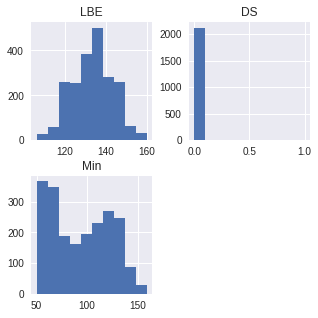

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5)) 
plt.style.use("seaborn")
histograma.hist(ax=ax);

In [ ]:
for i in histograma:
  df = histograma[i]
  fig = px.histogram(df, x=i,histfunc="avg", nbins=12)
  fig.show()

In [ ]:
for i in histograma:
  datahist = go.Histogram(x = histograma[i])
  fig = go.Figure(data=datahist)
  fig.update_layout(title_text=i,xaxis_title_text='Value',yaxis_title_text='Count')
  fig.show()

# Obtenga un gráfico box-plot para las variables: AC, ASTV y Mean. 
De igual manera que en el punto anterior, para se me hizo mejor hacerlo con go con mas detalle el boxplot, saber los puntos exactos que son outliers y tener en cuentas los cuantiles

In [ ]:
boxplot = data[["AC","ASTV","Mean"]]
boxplot

,AC,ASTV,Mean
0,0,73,137
1,4,17,136
2,2,16,135
3,2,16,134
4,4,16,136
5,1,26,107
6,1,29,107
7,0,83,122
8,0,84,122
9,0,86,122


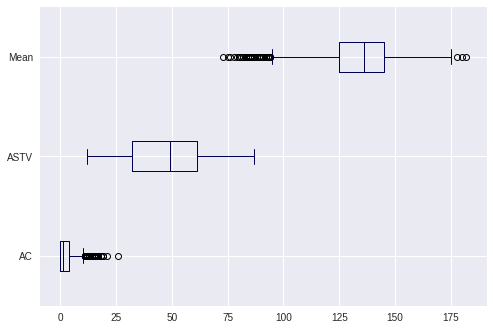

In [ ]:
boxplot.boxplot(vert=False, color = "#000054")

In [ ]:
for i in boxplot:
  databoxplot = go.Box(y = boxplot[i])
  layout = go.Layout(title = i)
  fig = go.Figure(data = databoxplot, layout = layout)
  fig.show()  